In [1]:
%load_ext watermark
%watermark -a 'Author: James Bourbeau' -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

Author: James Bourbeau 
last updated: 2017-04-06 

CPython 2.7.10
IPython 5.3.0

numpy 1.12.0
matplotlib 2.0.0
scipy 0.15.1
pandas 0.19.2
sklearn 0.18.1
mlxtend 0.5.1


In [17]:
from __future__ import division, print_function
import glob
import numpy as np
from scipy import interp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib as mpl
import pyprind

import composition as comp
import composition.analysis.plotting as plotting
    
# color_dict allows for a consistent color-coding for each composition
color_dict = comp.analysis.get_color_dict()

%matplotlib inline

In [3]:
df_sim, cut_dict = comp.load_dataframe(datatype='sim', return_cut_dict=True)

Returning without applying quality cuts


/home/jbourbeau/cr-composition/composition/dataframe_functions.py:140: RuntimeWarning: divide by zero encountered in log10
  df['log_dEdX'] = np.log10(df['eloss_1500_standard'])
/home/jbourbeau/cr-composition/composition/dataframe_functions.py:140: RuntimeWarning: invalid value encountered in log10
  df['log_dEdX'] = np.log10(df['eloss_1500_standard'])
/home/jbourbeau/cr-composition/composition/dataframe_functions.py:141: RuntimeWarning: divide by zero encountered in log10
  df['log_dEdX_standard'] = np.log10(df['eloss_1500_standard'])
/home/jbourbeau/cr-composition/composition/dataframe_functions.py:141: RuntimeWarning: invalid value encountered in log10
  df['log_dEdX_standard'] = np.log10(df['eloss_1500_standard'])
/home/jbourbeau/cr-composition/composition/dataframe_functions.py:142: RuntimeWarning: divide by zero encountered in log10
  df['log_dEdX_strong'] = np.log10(df['eloss_1500_strong'])
/home/jbourbeau/cr-composition/composition/dataframe_functions.py:142: RuntimeWarning: in

In [8]:
containment_mask = cut_dict['lap_IT_frac_containment'] & cut_dict['IceTopMaxSignal'] & \
    cut_dict['IceTopNeighbourMaxSignal'] & cut_dict['IceTopMaxSignalInEdge'] & cut_dict['lap_InIce_containment']

In [9]:
bins = np.linspace(-600, 600, 75)

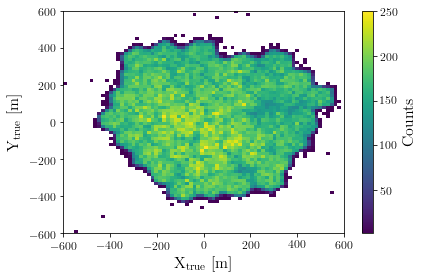

In [10]:
fig, ax = plt.subplots()
plotting.histogram_2D(df_sim['MC_x'], df_sim['MC_y'], bins=bins, ax=ax)
ax.set_xlabel('$\mathrm{X_{true} \ [m]}$')
ax.set_ylabel('$\mathrm{Y_{true} \ [m]}$')
plt.savefig('/home/jbourbeau/public_html/figures/uncontained-events.png')
plt.show()

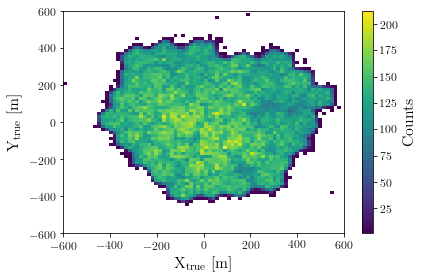

In [11]:
fig, ax = plt.subplots()
plotting.histogram_2D(df_sim['MC_x'][containment_mask], df_sim['MC_y'][containment_mask],
                      bins=bins, ax=ax)
ax.set_xlabel('$\mathrm{X_{true} \ [m]}$')
ax.set_ylabel('$\mathrm{Y_{true} \ [m]}$')
plt.savefig('/home/jbourbeau/public_html/figures/contained-events.png')
plt.show()

In [72]:
cut_keys = ['num_hits_1_60', 'lap_IT_containment', 'lap_InIce_containment', 'IceTopQualityCuts', 'InIceQualityCuts']
cut_labels = ['Number of hits', 'IT containment', 'InIce containment', 'Laputop quality cuts', 'Millipede quaility cuts']

In [13]:
dataframe_files = glob.glob('/data/user/jbourbeau/composition/IC79_data/dataframe_files/dataframe_run_????????.hdf5')

In [26]:
events = np.zeros_like(cut_keys)
bar = pyprind.ProgBar(len(dataframe_files))
for file_ in dataframe_files:
    try:
        df, cut_dict = comp.load_dataframe(file_, datatype='data', return_cut_dict=True)
        cut_mask = np.array([True]*len(df))
        for cut_idx, key in enumerate(cut_keys):
            cut_mask = cut_mask & cut_dict[key]
            events[cut_idx] += len(df[cut_mask])
        print('made it')
    except:
        pass
    finally:
        bar.update()
print(bar)

0%                          100%
[                              ]

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#                             ] | ETA: 00:01:10

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[##                            ] | ETA: 00:00:55

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[###                           ] | ETA: 00:00:49

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[####                          ] | ETA: 00:00:45

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#####                         ] | ETA: 00:00:42

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[######                        ] | ETA: 00:00:40

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#######                       ] | ETA: 00:00:38


Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts

[########                      ] | ETA: 00:00:36

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#########                     ] | ETA: 00:00:34

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[##########                    ] | ETA: 00:00:32

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[###########                   ] | ETA: 00:00:30

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[############                  ] | ETA: 00:00:28

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#############                 ] | ETA: 00:00:27

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[##############                ] | ETA: 00:00:25

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[###############               ] | ETA: 00:00:23

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[################              ] | ETA: 00:00:22

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#################             ] | ETA: 00:00:20

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[##################            ] | ETA: 00:00:18

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[###################           ] | ETA: 00:00:17

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[####################          ] | ETA: 00:00:15

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#####################         ] | ETA: 00:00:13

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[######################        ] | ETA: 00:00:12

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#######################       ] | ETA: 00:00:10

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[########################      ] | ETA: 00:00:09

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[#########################     ] | ETA: 00:00:07

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[##########################    ] | ETA: 00:00:06

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[###########################   ] | ETA: 00:00:04

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[############################  ] | ETA: 00:00:03

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[############################# ] | ETA: 00:00:01

Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts


[##############################] | ETA: 00:00:00 | ETA: 00:00:00
Total time elapsed: 00:00:47


Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Returning without applying quality cuts
Title: 
  Started: 04/06/2017 16:07:54
  Finished: 04/06/2017 16:08:42
  Total time elapsed: 00:00:47


In [27]:
events

array(['', '', '', '', ''], 
      dtype='|S21')

In [33]:
df_data, cut_dict = comp.load_dataframe(datatype='data', return_cut_dict=True)

Returning without applying quality cuts


In [43]:
events = []
cut_mask = np.array([True]*len(df_data))
for cut_idx, key in enumerate(cut_keys):
#     print(cut_dict[key].sum())
    cut_mask = cut_mask & cut_dict[key]
    events.append(cut_mask.sum())

In [49]:
events

[13830901, 9762107, 8018136, 8016065, 7212805]

In [56]:
# Live-time information
goodrunlist = pd.read_table('/data/ana/CosmicRay/IceTop_GRL/IC79_2010_GoodRunInfo_4IceTop.txt', skiprows=[0, 3])
goodrunlist.head()
livetimes = goodrunlist['LiveTime(s)']
livetime = np.sum(livetimes[goodrunlist['Good_it_L2'] == 1])

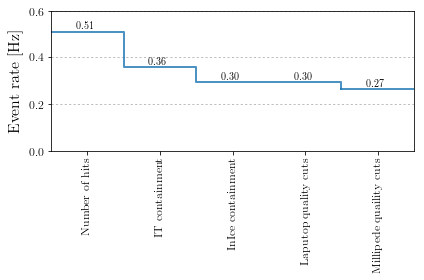

In [95]:
fig, ax = plt.subplots()
plotting.plot_steps(np.arange(len(events)+1), events/livetime, lw=2)
ax.set_xlim(0, len(events))
ax.set_ylabel('Event rate [Hz]')
ax.grid(axis='y')
x_ticks = [0.5, 1.5, 2.5, 3.5, 4.5]
for x, rate in zip(x_ticks, events/livetime):
    ax.text(x-0.16, rate+0.01, '{:0.2f}'.format(rate))
plt.xticks(x_ticks, cut_labels, rotation='vertical')
ax.set_ylim([0, 0.6])
plt.savefig('/home/jbourbeau/public_html/figures/event_rate.png')
plt.show()

In [96]:
df_data= comp.load_dataframe(datatype='data')

data quality cut event flow:
             IceTopQualityCuts:  0.706  0.706
         lap_InIce_containment:  0.813   0.58
              InIceQualityCuts:  0.727  0.521
                 num_hits_1_60:    1.0  0.521
             reco_energy_range:  0.672  0.375




In [97]:
len(df_data)

5188324

In [98]:
5188324/0.521

9958395.393474087